# SI 370 - Day 7 - Visualization II


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Overview

Today we're going to work through two datasets.  We'll spend about 15 minutes on the first two exercises and then rejoin the main group to share our results for about 10 minutes.  We'll then spend approximately 30 minutes on the
remaining exercises and regroup to share our results for the last 10 minutes.

Our first dataset today comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home and 
provides a number of variables about wine.

In [4]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Sometimes it's useful to set the value of one column based on a conditional value of another column.  To do so, use `np.where(...)`:

In [6]:
wine['is_good'] = np.where(wine['quality'] > 5, 'yes', 'no')

In [7]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

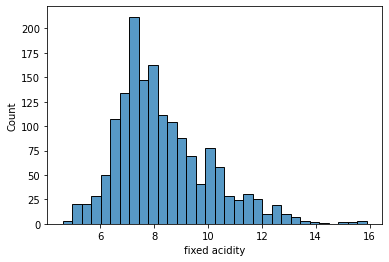

In [8]:
sns.histplot(wine['fixed acidity'])

A pairplot is a convenient way to see histograms as well as scatterplots in the same figure:

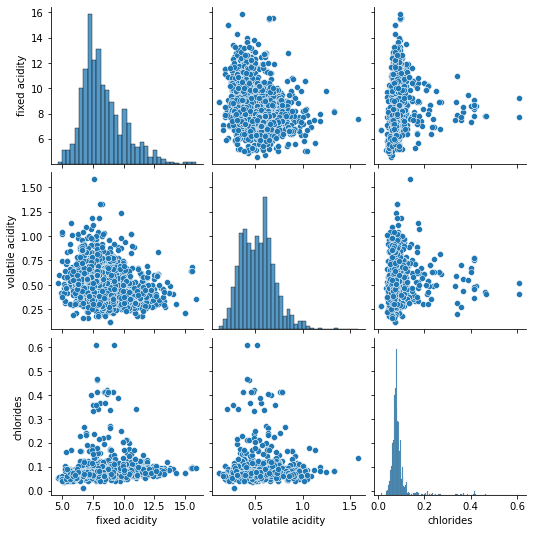

In [9]:
sns.pairplot(wine, vars=['fixed acidity', 'volatile acidity', 'chlorides'])
#shift tab for super clutch menu

## Exercise 1

Create a similar pairplot, but color the points according to the value of the "is_good" column.

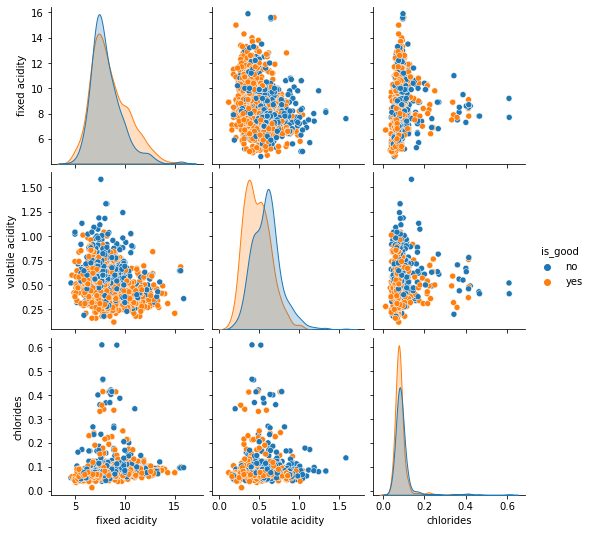

In [21]:
sns.pairplot(wine, vars=['fixed acidity', 'volatile acidity', 'chlorides'], hue = 'is_good')

## JointPlots

A `jointplot` is another way of visualizing both the distribution and relationship of variables, although in 
this case you can only specify two variables:

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

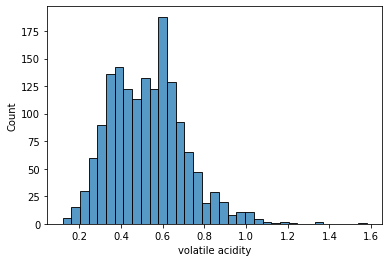

In [11]:
sns.histplot(wine['volatile acidity'])

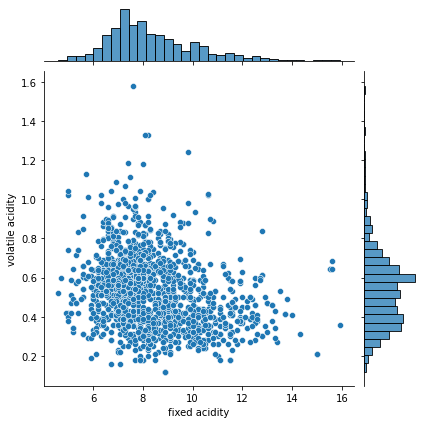

In [12]:
sns.jointplot(data=wine, x='fixed acidity', y='volatile acidity')

## Exercise 2
Create a jointplot of any two (other) variables.

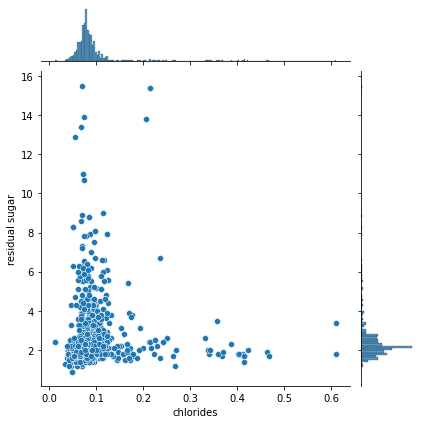

In [22]:
sns.jointplot(data=wine, x='chlorides', y='residual sugar')

## The McDonalds Menu Dataset

For the remainder of our time together today, let's load the McDonalds Menu Dataset:

In [23]:
menu = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/menu.csv')

### Exercise 3
Take a minute to get some basic descriptive statistics about the dataset.  

In [24]:
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [25]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

### Exercise 4
Create a histogram for any one of the continuous variables in the McDonald's Menu Dataset (loaded above).  Do this in three ways:
1. Using the matplotlib-pandas integration by accessing the `.plot` attribute of the Series
2. Using seaborn's displot()
3. Using seaborn's histplot()

Explain, in your own words, how those ways differ and when you should use each of those ways.

<AxesSubplot:ylabel='Frequency'>

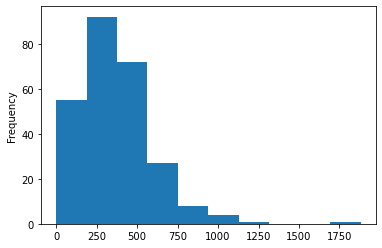

In [27]:
menu['Calories'].plot.hist()

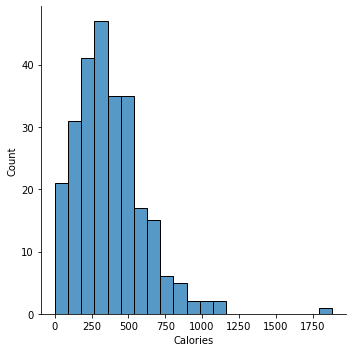

In [49]:
sns.displot(data= menu, x = 'Calories')

<AxesSubplot:xlabel='Calories', ylabel='Count'>

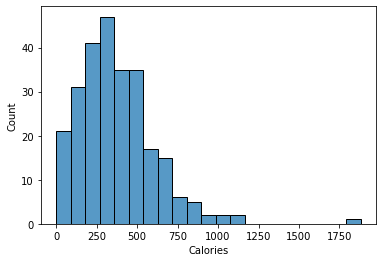

In [30]:
sns.histplot(data= menu, x = 'Calories')

I used existing documentation for pandas and seaborn to create the required graphs.

## Exercise 5

Create a scatterplot of your choice of two continuous variables from the McDonald's Menu Dataset.  What trends or
interesting things do you notice from your visualizations?

<AxesSubplot:xlabel='Calories', ylabel='Carbohydrates'>

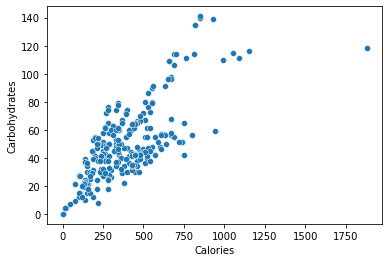

In [31]:
sns.scatterplot(data = menu, x = 'Calories', y = 'Carbohydrates')

We can see a strong, positive, likely linear (not confirmed or fit), relationship between Calories and Carbohydrates. Created using existing documentation for Seaborn

## Exercise 6

Create a series of facets that show the relationship between Calories and Total Fat for each Category.

Hint: check out the [documentation on FacetGrid](https://seaborn.pydata.org/tutorial/axis_grids.html).

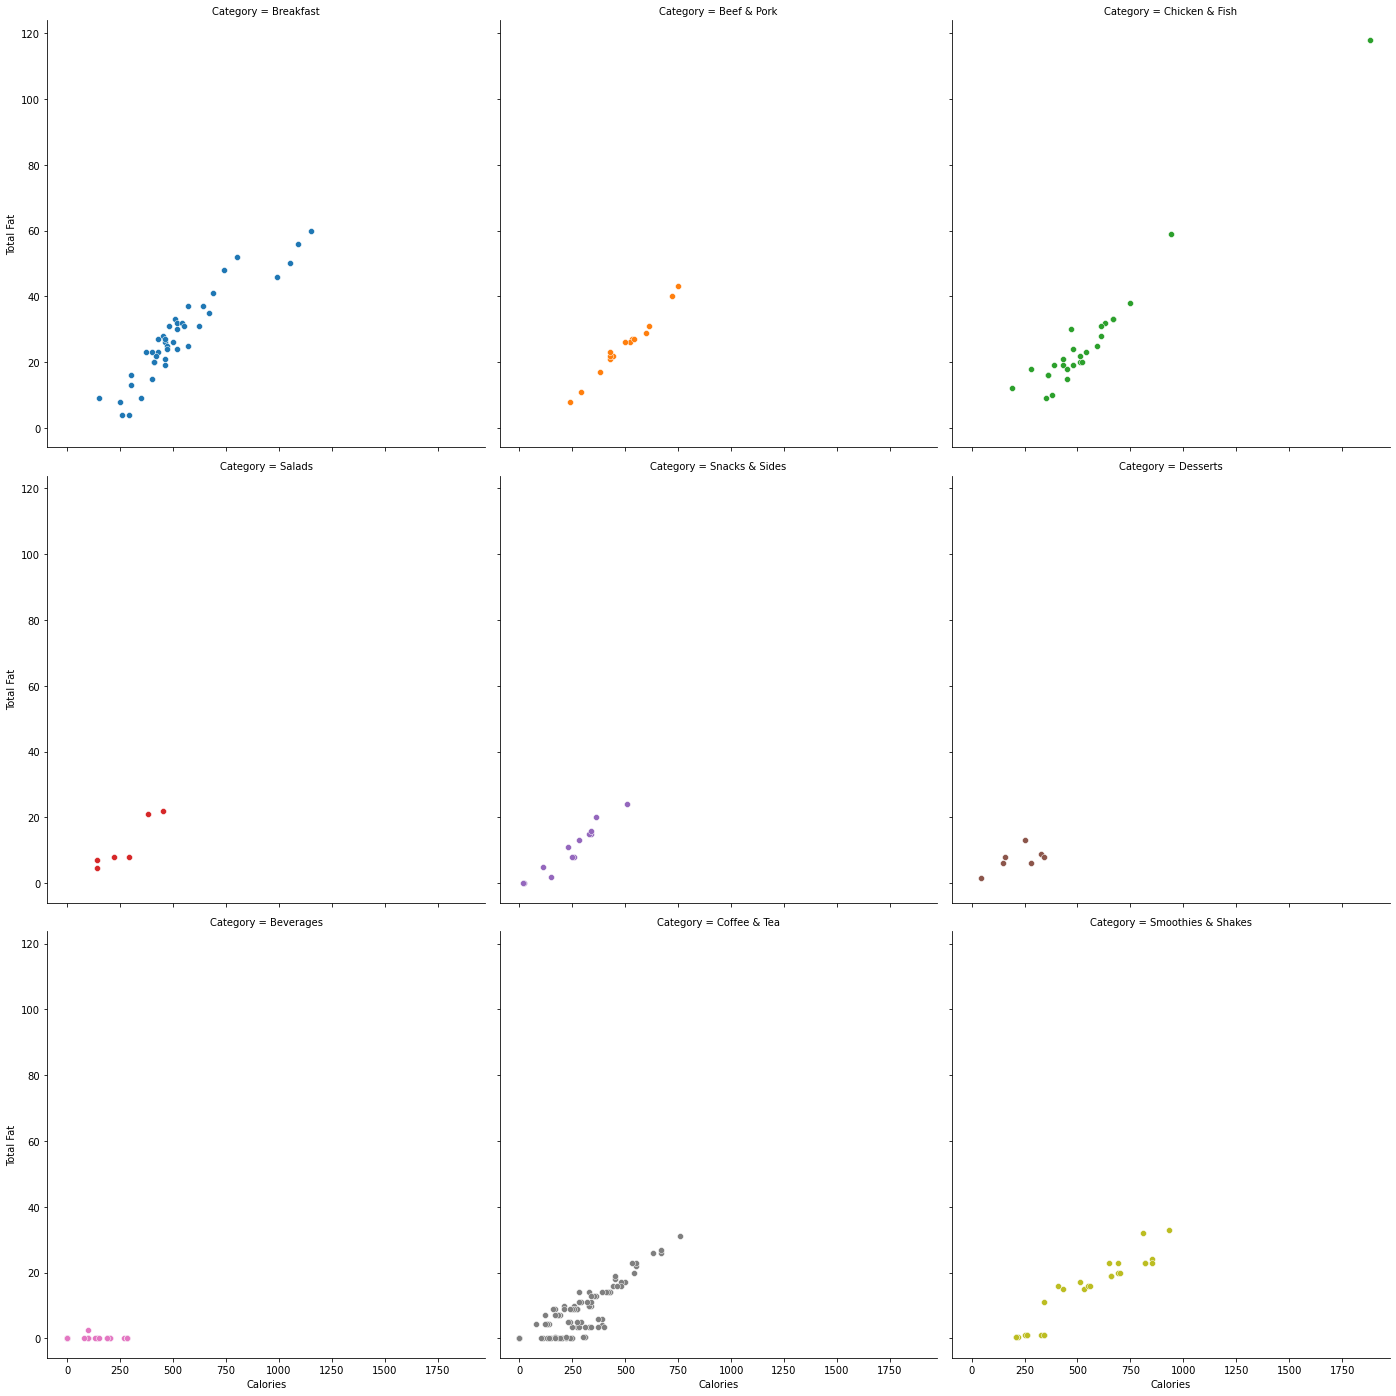

In [47]:
face = sns.FacetGrid(menu, col="Category", col_wrap=3, hue= 'Category', height = 6.5, aspect = 1)
face.map(sns.scatterplot, 'Calories', 'Total Fat')